<h1><center>Imports</center></h1>

In [4]:
import tensorflow as tf
print('tf.__version__:', tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import h5py

tf.__version__: 2.0.0


<h1><center>Functions</center></h1>

In [5]:
def load_data(file):
    '''
    loads h5py file
    '''
    # Open the file as readonly
    h5f = h5py.File('prepare_data.h5', 'r')

    # Load the training, test and validation set
    X_train = h5f['X_train'][:]
    y_train = h5f['y_train'][:]
    X_val = h5f['X_val'][:]
    y_val = h5f['y_val'][:]
    X_test = h5f['X_test'][:]
    y_test = h5f['y_test'][:]

    # Close this file
    h5f.close()
    return(X_train, y_train, X_val, y_val, X_test, y_test)

In [6]:
def read_data_labels(file):
    '''
    prints the labels of a h5py file
    '''
    # Open the file as readonly
    h5f = h5py.File('prepare_data.h5', 'r')
    
    print('labels:', list(h5f.keys()))

    # Close this file
    h5f.close()

In [7]:
def create_model():
    '''
    Creates a CNN model
    '''
    model = Sequential()
    # layer 1
    model.add(Conv2D(filters=32, 
                     kernel_size=(3, 3), 
                     padding='same', 
                     activation='relu', 
                     input_shape=[32, 32, 1]))
    # layer 2
    model.add(Conv2D(filters=32, 
                     kernel_size=(3, 3), 
                     padding='same', 
                     activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
    # dropout prevents overfitting
    model.add(Dropout(0.5))
    # Layer 2 can be re-pasted for a deeper network

    # Flattening layer
    model.add(Flatten())

    # Dense layer
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=11, activation='softmax')) # bec/ 11 classes, sigma might work too
    
    # learning rate = 0.001
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return(model)

In [8]:
def plot_distribution(train, val, test):
    '''
    plots the distribution of labels in the data set
    '''    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

    fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)
    

    ax1.hist(y_train, bins=10)
    ax1.set_title("Training set")
    
    ax2.hist(y_val, color='r', bins=10)
    ax2.set_title("Validation set")

    ax3.hist(y_test, color='g', bins=10)
    ax3.set_title("Test set")

    fig.tight_layout()

<h1><center>In Line Code</center></h1>

<h1>1) Pull in data from "prepare_data.h5"</h1>

In [9]:
file = 'prepare_data.h5'
X_train, y_train, X_val, y_val, X_test, y_test = load_data(file)

print('X_train: {}, y_train: {}, labels: {}'.format(X_train.shape, y_train.shape, np.unique(y_train)))
print('X_val: {}, y_val: {}, labels: {}'.format(X_val.shape, y_val.shape, np.unique(y_val)))
print('X_test: {}, y_test: {}, labels: {}'.format(X_test.shape, y_test.shape, np.unique(y_test)))

X_train: (65932, 32, 32, 1), y_train: (65932,), labels: [ 0  1  2  3  4  5  6  7  8  9 10]
X_val: (11635, 32, 32, 1), y_val: (11635,), labels: [ 0  1  2  3  4  5  6  7  8  9 10]
X_test: (27627, 32, 32, 1), y_test: (27627,), labels: [ 0  1  2  3  4  5  6  7  8  9 10]


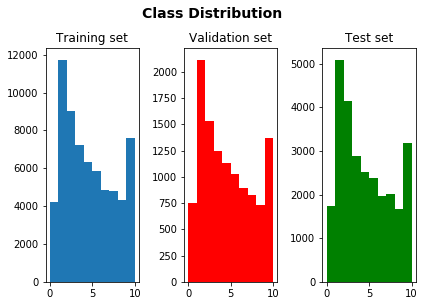

In [10]:
plot_distribution(y_train, y_val, y_test)

<h1>2) Build CNN model</h1>

In [11]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 11)                1

In [9]:
%%capture
loss, acc = model.evaluate(X_test, y_test)

In [10]:
print('Untrained model accuracy: {}%'.format(round(acc*100, 2)))

Untrained model accuracy: 5.21%


<h1>4) Train CNN model</h1>

In [11]:
history = model.fit(x=X_train, 
                    y=y_train, 
                    batch_size=10, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(X_val, y_val))
# if val_acc < train_acc = model_overfitting, if val_acc > train_acc = model_underfitting, 

Train on 65932 samples, validate on 11635 samples
Epoch 1/10
65932/65932 [==============================] - 137s 2ms/sample - loss: 1.5161 - accuracy: 0.5301 - val_loss: 0.6835 - val_accuracy: 0.7988
Epoch 2/10
65932/65932 [==============================] - 133s 2ms/sample - loss: 0.7196 - accuracy: 0.7852 - val_loss: 0.6980 - val_accuracy: 0.7862
Epoch 3/10
65932/65932 [==============================] - 133s 2ms/sample - loss: 0.6151 - accuracy: 0.8163 - val_loss: 0.5707 - val_accuracy: 0.8352
Epoch 4/10
65932/65932 [==============================] - 134s 2ms/sample - loss: 0.5635 - accuracy: 0.8320 - val_loss: 0.5574 - val_accuracy: 0.8339
Epoch 5/10
65932/65932 [==============================] - 134s 2ms/sample - loss: 0.5304 - accuracy: 0.8438 - val_loss: 0.5228 - val_accuracy: 0.8525
Epoch 6/10
65932/65932 [==============================] - 133s 2ms/sample - loss: 0.5078 - accuracy: 0.8491 - val_loss: 0.5288 - val_accuracy: 0.8511
Epoch 7/10
65932/65932 [==========================

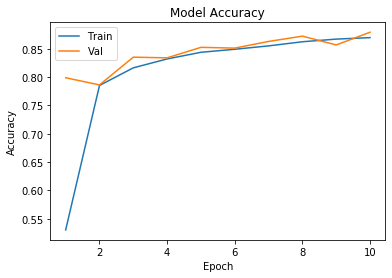

In [13]:
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

<h1>5) Save model and model weights</h1>

In [14]:
model.save('CNN_trained_models/CNN_model.h5')

In [15]:
# new_model = tf.keras.models.load_model('my_model.h5')
# new_model.summary

# %%capture
# loss, acc = new_model.evaluate(X_test, y_test)

# print('new_model accuracy: {}%'.format(round(acc*100, 2)))

In [16]:
model.save_weights('CNN_trained_models/CNN_weights')

In [23]:
new_model = create_model()

In [24]:
%%capture
loss, acc = new_model.evaluate(X_test, y_test)

In [25]:
print('new_model accuracy: {}%'.format(round(acc*100, 2)))

new_model accuracy: 9.11%


In [26]:
%%capture
new_model.load_weights('CNN_trained_models/CNN_weights')
loss, acc = new_model.evaluate(X_test, y_test)

In [27]:
print('pre-trained_model accuracy: {}%'.format(round(acc*100, 2)))

pre-trained_model accuracy: 85.42%


<h1>5) Test CNN model</h1>

In [28]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [29]:
y_pred = model.predict_classes(x=X_test)

In [31]:
print('y_test:', y_test)
print('y_pred:', y_pred)

correct_answers = np.sum(y_test == y_pred)
total = y_test.shape[0]
per_correct = (correct_answers/total)*100
print('per_correct: {}%'.format(round(per_correct, 2)))

y_test: [ 5  2  1 ... 10 10 10]
y_pred: [ 5  2  1 ...  7 10 10]
per_correct: 85.42%


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e8c3b19848>)

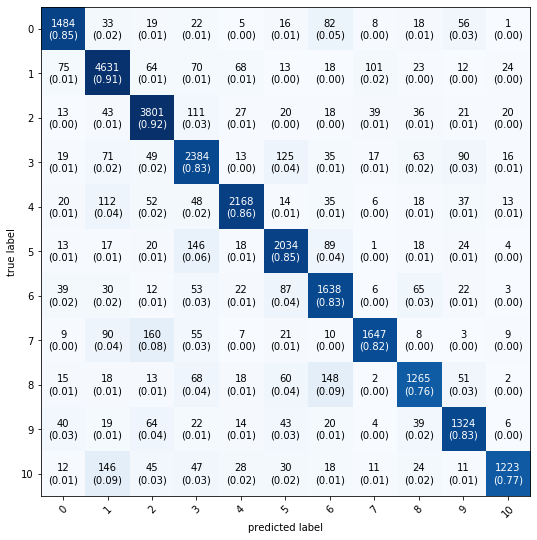

In [32]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(mat, figsize=(9, 9), class_names=np.arange(0, 11), show_normed=True)